# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
> This dataset is about medical appointments in Brazil, a sample over 100k the information of this dataset is collected from. the questions of this dataset strongly focus on Why do 30% (approximately) of patients miss their scheduled appointments?<br>
>>and every patient has its own:<br>
>><ul>
    <li>ID </li>
    <li>ScheduledDay: indicates to the day the patients set up the appointment on.</li>
    <li>AppointmentDay: is the day that the patient is going to hospital.</li>
    <li>Neighborhood: indicates the location of the hospital.</li>
    <li>Age</li>
    <li>Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
    <li>Hipertension: if the patient suffers from Hipertension.</li>
    <li>Diabetes:if the patient suffers from Diabetes.</li>
    <li>Alcoholism: if the patient is Alcoholism</li>
    <li>Handcap: if the patient has a Handcap.</li>
    <li>SMS_received: if the patient receied an SMS.</li>
    <li>No-show: if the patient missed his/her appointment, <b>'Yes'</b> indicates that the patient missed the appointment  <b>'No'</b> indicates that the patient did not miss the appointment.</li>
</ul>

### Question(s) for Analysis
####  independent variables:
>##### 1. What is the probability (in percent) that the reason of causing patients to miss their appointments is that the patients have: Scholarships, Hipertension, Diabetes, Alcoholism or at least one Handcap.
>##### 2. What is the effectivness of the SMS on patients? Or does the SMS reduce the percentage of those who missed their appointment?
>##### 3. What is the Neighbourhood that has the biggest no show patients?
>##### 4. What is the average ages who missed their appointments? and what is the most no show age?
>##### 5. Who misses their appointments more, men or women?
#### dependent variables:
>##### 6. Is there a relationship between age and waiting days?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme()

<a id='wrangling'></a>
## Data Wrangling

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


checking the **data type** or if there is any **missing value**.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


 checking for any **duplicated rows**.

In [5]:
df.duplicated().unique()

array([False])

checking if there is any **age** contains **negative value**.

In [6]:
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


checking the time of **AppointmentDay**.

In [7]:
df['AppointmentDay']

0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
5         2016-04-29T00:00:00Z
6         2016-04-29T00:00:00Z
7         2016-04-29T00:00:00Z
8         2016-04-29T00:00:00Z
9         2016-04-29T00:00:00Z
10        2016-04-29T00:00:00Z
11        2016-04-29T00:00:00Z
12        2016-04-29T00:00:00Z
13        2016-04-29T00:00:00Z
14        2016-04-29T00:00:00Z
15        2016-04-29T00:00:00Z
16        2016-04-29T00:00:00Z
17        2016-04-29T00:00:00Z
18        2016-04-29T00:00:00Z
19        2016-04-29T00:00:00Z
20        2016-04-29T00:00:00Z
21        2016-04-29T00:00:00Z
22        2016-04-29T00:00:00Z
23        2016-04-29T00:00:00Z
24        2016-04-29T00:00:00Z
25        2016-04-29T00:00:00Z
26        2016-04-29T00:00:00Z
27        2016-04-29T00:00:00Z
28        2016-04-29T00:00:00Z
29        2016-04-29T00:00:00Z
                  ...         
110497    2016-06-01T00:00:00Z
110498  

#### *notes on data*:
>1. the data types of **PatientId** and **AppointmentID** need to be strings instead, because there's no use to be float or int values also it can reduce the memory usage.<br>
>2. the age with negative value needs to be cleaned.<br>
>3. the **AppointmentDay** times are almost not taken, so there is no use of **ScheduledDay** & **AppointmentDay** times. also there might be days in **AppointmentDay** that came before **ScheduledDay**, if so they have to be cleaned.<br>
>4. change <b>'No-show'</b> column label name to <b>'no_show'</b> to be easier when working with it.


### Data Cleaning

#### First, we need to change the data types of patientID & AppointmentID to strings

In [8]:
df['PatientId'] = df['PatientId'].astype(str)
df['AppointmentID'] = df['AppointmentID'].astype(str)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(7)
memory usage: 11.8+ MB


#### Second, we need to remove ages with negative numbers

In [10]:
df.drop(99832, axis=0, inplace=True)

In [11]:
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


#### third, we need to delete times form PatientId&AppointmentID and add 'waiting_days' column that calculates the number of days that patient waited and if there negative values, they have to be removed!

***First task***, removing time stamps 

In [12]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date

In [13]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


***second task***, creat new column named <b>'waiting_days'</b> that computes the days the patient waited by subraction AppointmentDay from ScheduledDay.

In [14]:
df['waiting_days'] =df['AppointmentDay'] - df['ScheduledDay']
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_days
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days


***third task***, checking if there are days with negative values

In [15]:
df['waiting_days'].value_counts().sort_index().head(5)

-6 days        1
-1 days        4
0 days     38562
1 days      5213
2 days      6725
Name: waiting_days, dtype: int64

Since there are days with **negative values**, we have to drop them!

In [16]:
# dropping the day with -1 value

df.drop(df.query('waiting_days == "-1 days"').index, axis=0, inplace=True)

In [17]:
#checking

df.query('waiting_days == "-1 days"').index

Int64Index([], dtype='int64')

In [18]:
#dropping the days with -6 values

df.drop(df.query('waiting_days == "-6 days"').index, axis=0, inplace=True)

In [19]:
# checking

df.query('waiting_days == "-6 days"')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_days


**Finally**, we need to change the data type of <b>'waiting_days'</b> column to ``int`` values indicating for **days** only so that i can answer the last quesion(about the relationship between Age and waiting days).

In [20]:
df['waiting_days'] = df['waiting_days'].astype(str).str.split(" ").str[0].astype(int)

In [21]:
# checking the result

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_days
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


#### The last thing in cleaning, is to change 'No-show' column label to 'no_show'

In [22]:
df.rename(columns={"No-show" : "no_show"}, inplace=True)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,waiting_days
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: What is the probability (in percent) that the reason of causing patients to miss their appointments is that the patients have: Scholarships, Hipertension, Diabetes, Alcoholism or at least one Handcap.

Well, it would be intersting at the begining to know what is the exact percentage of all no show patients!

In [23]:
(df['no_show'].value_counts()[1] / df['no_show'].value_counts()[0] ) *100

25.297312004716176

>OK, that means ***%25.3*** of all patients missed their appointment.<br>
so let's start our analysis, trying to figure out what made those patients to miss their appointment!

First, we need to create a data frame that contains patients who **missed their appointment**.

In [24]:
no_show_patients = df.query('no_show == "Yes"')
no_show_patients.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,waiting_days
6,733688164476661.0,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2
7,3449833394123.0,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2
11,7542951368435.0,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,3
17,14794966191172.0,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes,1
20,622257462899397.0,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,2


and then compute the probability to each variable

In [25]:
no_show_Scholarship = no_show_patients.Scholarship.value_counts()[1]
total_Scholarship = df.Scholarship.value_counts()[1]

# the probability that the patient miss his/her appointment because of Scholarship 

prob_Scholarship = (no_show_Scholarship / total_Scholarship) * 100
prob_Scholarship

23.73630420771568

In [26]:
no_show_Hipertension = no_show_patients.Hipertension.value_counts()[1]
total_Hipertension = df.Hipertension.value_counts()[1]

# the probability that the patient miss his/her appointment because of Hipertension 

prob_Hipertension = (no_show_Hipertension / total_Hipertension) * 100
prob_Hipertension

17.301958625751112

In [27]:
no_show_Diabetes = no_show_patients.Diabetes.value_counts()[1]
total_Diabetes = df.Diabetes.value_counts()[1]

# the probability that the patient miss his/her appointment because of Diabetes

prob_Diabetes = (no_show_Diabetes / total_Diabetes) * 100
prob_Diabetes

18.00327332242226

In [28]:
no_show_Alcoholism = no_show_patients.Alcoholism.value_counts()[1]
total_Alcoholism = df.Alcoholism.value_counts()[1]

# the probability that the patient miss his/her appointment because of Alcoholism

prob_Alcoholism = (no_show_Alcoholism / total_Alcoholism) * 100
prob_Alcoholism

20.148809523809526

In [29]:
# for at least one handcap we need to get all handcaps greater than one
no_show_patients.Handcap.value_counts()

0    21909
1      364
2       37
3        3
4        1
Name: Handcap, dtype: int64

In [30]:
df.Handcap.value_counts()

0    108282
1      2040
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [31]:
no_show_Handcap = 364 + 37 + 3 + 1
total_Handcap = 2040 + 183 + 13 + 3
prob_Handcap = (no_show_Handcap / total_Handcap) * 100
prob_Handcap

18.088432335864223

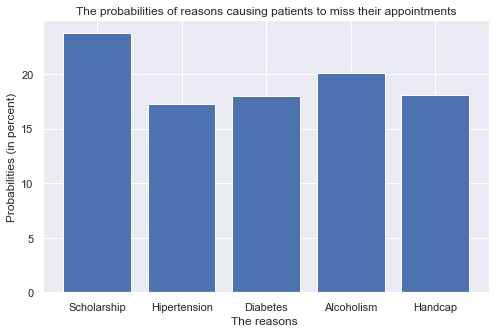

In [32]:
plt.figure(figsize=(8, 5))
plt.bar(['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'],
        [prob_Scholarship, prob_Hipertension,prob_Diabetes, prob_Alcoholism, prob_Handcap]);
plt.title("The probabilities of reasons causing patients to miss their appointments")
plt.xlabel("The reasons ")
plt.ylabel("Probabilities (in percent)");

>The bar chart above shows that patients who have scholarships is more likely to **miss** their appointments with probability of ***%23.7*** than the other reasons!

### Research Question 2: What is the effectivness of the SMS on patients? Or does the SMS reduce the percentage of those who missed their appointment?

To answer that question we have to compare between patients **who received SMS** and **who didn't**.<br>
So, at first we will creat **two** data frames: one for those **who received SMS** and the other for those **who did not receive SMS**. <br>
And then, get the percentages of patients **who missed** and **did not miss** their appointment for each data frame.

In [33]:
#for who received at least one SMS

received_SMS = df.query('SMS_received > 0')
received_SMS.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,waiting_days
11,7542951368435.0,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,3
15,99948393975.0,5620206,F,2016-04-26,2016-04-29,15,NOVA PALESTINA,0,0,0,0,0,1,No,3
18,17135378245248.0,5621836,F,2016-04-26,2016-04-29,30,NOVA PALESTINA,1,0,0,0,0,1,No,3
22,863229818887631.0,5616091,M,2016-04-25,2016-04-29,13,CONQUISTA,0,0,0,0,0,1,Yes,4
25,5819369978796.0,5624020,M,2016-04-26,2016-04-29,46,CONQUISTA,0,1,0,0,0,1,No,3


In [34]:
#to know the number of samble:
received_SMS.shape

#therefore, the number is 35482

(35482, 15)

In [35]:
missed_appointment = (received_SMS['no_show'].value_counts()[1] / 35482) * 100
notMissed_appointment = (received_SMS['no_show'].value_counts()[0] / 35482) * 100
print("missed appointment : {}\n notMissed appointment : {}".format(missed_appointment, notMissed_appointment))

missed appointment : 27.574544839637
 notMissed appointment : 72.425455160363


In [36]:
not_receivedSMS = df.query('SMS_received == 0')
print(not_receivedSMS.shape)      # the number of samble is 75039

notMissed_appointment_2 = (not_receivedSMS['no_show'].value_counts()[0] / 75039) * 100
missed_appointment_2 = (not_receivedSMS['no_show'].value_counts()[1] / 75039) * 100
print("notMissed appointment_2 : {}\n missed appointment_2 : {}".format(notMissed_appointment_2, missed_appointment_2))

(75039, 15)
notMissed appointment_2 : 83.3020162848652
 missed appointment_2 : 16.697983715134797


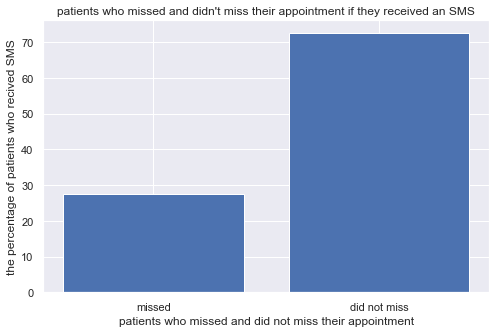

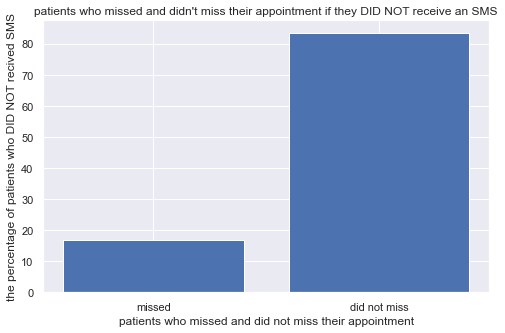

In [37]:
plt.figure(figsize=(8, 5))
plt.bar(['missed', 'did not miss'], [missed_appointment, notMissed_appointment]);
plt.title("patients who missed and didn't miss their appointment if they received an SMS");
plt.xlabel("patients who missed and did not miss their appointment")
plt.ylabel("the percentage of patients who recived SMS");
plt.figure(figsize=(8, 5))
plt.bar(['missed', 'did not miss'], [missed_appointment_2, notMissed_appointment_2]);
plt.title("patients who missed and didn't miss their appointment if they DID NOT receive an SMS");
plt.xlabel("patients who missed and did not miss their appointment")
plt.ylabel("the percentage of patients who DID NOT recived SMS");

The 2 bar charts above shows a kind of comparason between who received SMS and who didn't, to see if the SMS is an effective way to reduce the miss of appointment.
#### The percentage of patients who missed and who didn't miss their appointment in the first bar char (Received SMS) : 
>1. who missed their appointment: ***%27.6***.
>2. who did not miss their appointment: ***%72.4***.<br>

#### In the second bar chart (Did not receive SMS):
>1. who missed their appointment: ***%16.7***.
>2. who did not miss their appointment: ***%83.3***.

### Research Question 3: What is the Neighbourhood that has the biggest no show patients?

##### The first 3 Neighbourhoods:

In [38]:
no_show_patients['Neighbourhood'].value_counts().head(3)

JARDIM CAMBURI    1465
MARIA ORTIZ       1219
ITARARÉ            923
Name: Neighbourhood, dtype: int64

In [39]:
no_show_patients['Neighbourhood'].mode()[0]

'JARDIM CAMBURI'

In [40]:
df['Neighbourhood'].mode()[0]

'JARDIM CAMBURI'

>So, the neighbourhood that has the biggest no show patients is **JARDIM CAMBURI**.<br>
***Note:*** this neighbourhood has also the biggest patients!

### Research Question 4: What is the average ages who missed their appointments? and what is the most no show age?

In [41]:
no_show_patients['Age'].describe()

count    22314.000000
mean        34.317872
std         21.965009
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

>So, the Avarage ages that missed their appointments is about ***34*** with a standard diviation ***21.965***

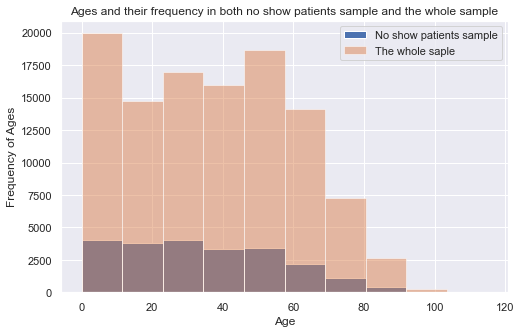

In [70]:
plt.figure(figsize=(8,5));
plt.hist(no_show_patients['Age']);
plt.hist(df['Age'], alpha=0.5);
plt.title("Ages and their frequency in both no show patients sample and the whole sample")
plt.xlabel("Age")
plt.ylabel("Frequency of Ages");
plt.legend(["No show patients sample", "The whole saple"]);

 to know the age that missed his appointment too much we have to get the percentage of frequency for a particualr age 
 **in the no show patients sample** and the subtract it from the percentage of frequency for a particualr age **in the whole samble**
 and then get the heighst value and see what is the age.

In [43]:
no_show_freq = (no_show_patients['Age'].value_counts() / 22314) * 100 

In [44]:
whole_sample_freq = (df['Age'].value_counts() / 110521) * 100

In [45]:
no_show_age = ((no_show_patients['Age'].value_counts() / 22314) * 100) - ((df['Age'].value_counts() / 110521) * 100)
no_show_age 

0     -0.338433
1     -0.196804
2     -0.334639
3     -0.127597
4      0.088438
5      0.086822
6      0.039942
7      0.054195
8      0.136671
9      0.389870
10     0.209651
11     0.025686
12     0.230918
13     0.359892
14     0.404579
15     0.347321
16     0.313429
17     0.409319
18     0.223076
19     0.364207
20     0.290724
21     0.277152
22     0.324415
23     0.316569
24     0.314790
25     0.372284
26     0.237360
27     0.228494
28     0.177697
29     0.209450
         ...   
73    -0.225761
74    -0.145840
75    -0.129213
76    -0.108828
77    -0.122795
78    -0.090647
79    -0.079503
80    -0.099355
81    -0.113928
82    -0.058905
83     0.020025
84    -0.124542
85    -0.029228
86    -0.047027
87    -0.045484
88    -0.060228
89    -0.026568
90     0.004451
91    -0.001458
92     0.011817
93    -0.003140
94    -0.002970
95     0.005174
96    -0.010900
97    -0.000990
98    -0.000947
99          NaN
100         NaN
102         NaN
115    0.008920
Name: Age, Length: 103, 

We have to get th heighst value and see what is the Age that we're searching for.

In [46]:
no_show_age_value = no_show_age.max()
no_show_age_value

0.40931922919365804

In [47]:
no_show_age[17]

0.40931922919365804

### the answer:
>#### the age that missed the appointment too much is *17th age*.

### Research Question 5: Who misses their appointments more, men or women?

In [48]:
no_show_patients['Gender'].value_counts()

F    14591
M     7723
Name: Gender, dtype: int64

In [49]:
df['Gender'].value_counts()

F    71836
M    38685
Name: Gender, dtype: int64

In [50]:
male = (7723 / 38685) * 100
female = (14591 / 71836) * 100

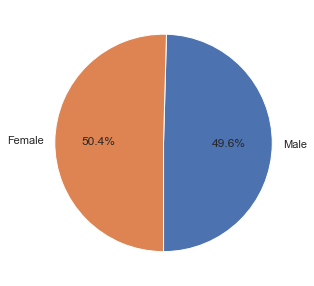

In [51]:
plt.figure(figsize=(10, 5))
plt.pie([male, female], labels=["Male", "Female"], autopct='%1.1f%%', startangle=270);

>The pie chat above shows that **females** is *slightly* missing their appointment *more* than **men**.

### Research Question 6: Is there a relationship between age and waiting days?

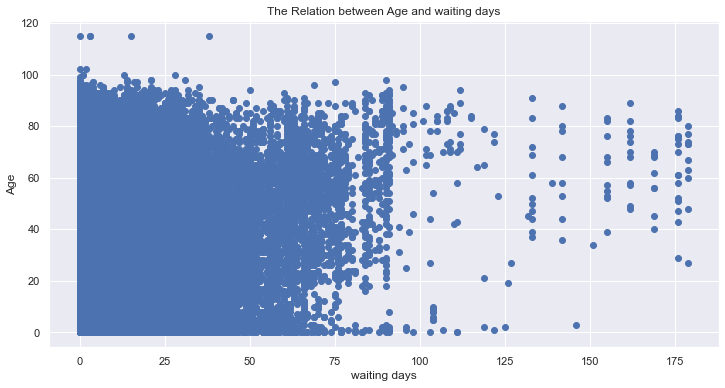

In [52]:
plt.figure(figsize=(12, 6));
plt.scatter(x=df['waiting_days'], y=df['Age']);
plt.title("The Relation between Age and waiting days");
plt.xlabel("waiting days")
plt.ylabel("Age");

>As it in Scatter plot above, the waiting days increase approximatley at the age 20 to 80 years.

<a id='conclusions'></a>
## Conclusions
>1. Patients who have **scholarships** is more likely to miss their appointments with probability of ***%23.7*** than the other reasons! and the reason that came after that is **Alcoholism** with probaility of ***%20.1***.
>2. The result of comparason between who received SMS and who didn't, to see if the SMS is an effective way to reduce the miss of appointment.
>#### The percentage of patients who missed and who didn't miss their appointment in the first bar char (Received SMS) : 
>>1. who missed their appointment: ***%27.6***.
>>2. who did not miss their appointment: ***%72.4***.<br>
>#### In the second bar chart (Did not receive SMS):
>>1. who missed their appointment: ***%16.7***.
>>2. who did not miss their appointment: ***%83.3***.
>3. the neighbourhood that has the biggest no show patients is **JARDIM CAMBURI**.
>4. the Avarage ages that missed their appointments is about ***34*** with a standard diviation ***21.965***. And the ***17th*** age is the age that missed the appointment too much.
>5.**Females** is *slightly* missing their appointment *more* than **men** (with ***%0.8*** difference).
>6. the waiting days increase approximatley at the age 20 to 80 years.

### Limitations
>1. the data types of **PatientId** and **AppointmentID** need to be strings instead, because there's no use to be float or int values also it can reduce the memory usage.<br>
>2. the Age with negative value was removed because there's no age is less than 0 years!
>3. the appointment days that came before scheduled days was removed because the scheduled days always came after appointment days. And also time in AppointmentDay & ScheduledDay was removed because the time in AppointmentDay was almost not recorded.
>4. column label 'No-show' is changed to 'no_show' to be easier while coding.